In [1]:
import numpy as np
import torch
from torch import nn,optim
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms, models


In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
device = "cuda"
device

'cuda'

In [4]:
imsize = 224
transform = transforms.Compose([
              transforms.Resize(imsize),
              transforms.ToTensor(),
              transforms.Normalize((0.485, 0.456, 0.406), 
                                  (0.229, 0.224, 0.225))
            ])


In [15]:
#The unsqueeze() function is used to add an extra dimension to the images, as per the requirements to feed images to the VGG-19 model

def image_loader(image_name):
  image = Image.open(image_name)
  image = transform(image).unsqueeze(0)
  return image

In [16]:
content_img = image_loader("/content/gdrive/My Drive/My Drive/images/style_dog.jpg").to(device)
style_img = image_loader("/content/gdrive/My Drive/My Drive/images/style_matisse.jpg").to(device)

In [17]:
unloader = transforms.Compose([
               transforms.Normalize((-0.485/0.229, 
                                     -0.456/0.224, 
                                     -0.406/0.225), 
                                     (1/0.229, 1/0.224, 1/0.225)),
               transforms.ToPILImage()])

In [19]:
def tensor2image(tensor):
    image = tensor.to('cpu').clone() 
    image = image.squeeze(0)  
    image = unloader(image)
    return image

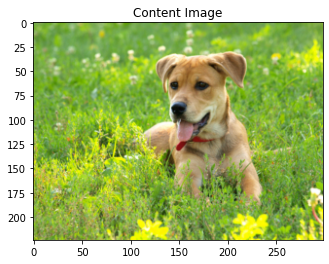

In [20]:
plt.figure()
plt.imshow(tensor2image(content_img))
plt.title("Content Image")
plt.show()

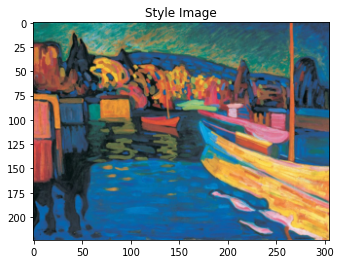

In [21]:
plt.figure()
plt.imshow(tensor2image(style_img))
plt.title("Style Image")
plt.show()